<a href="https://colab.research.google.com/github/JairLeal157/MLDiabetes/blob/main/Experimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder



**1. Importacion de datos y exploracion basica de los datos**

importamos los datos e imprimiremos sus características junto a la forma del compartamiento de cada una de sus variables



In [2]:
# Importamos los datos de csv en un dataframe de pandas
data= pd.read_csv("diabetes_prediction_dataset.csv")

# Columnas del dataframe
data.info()

# Ejemplo de los datos
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


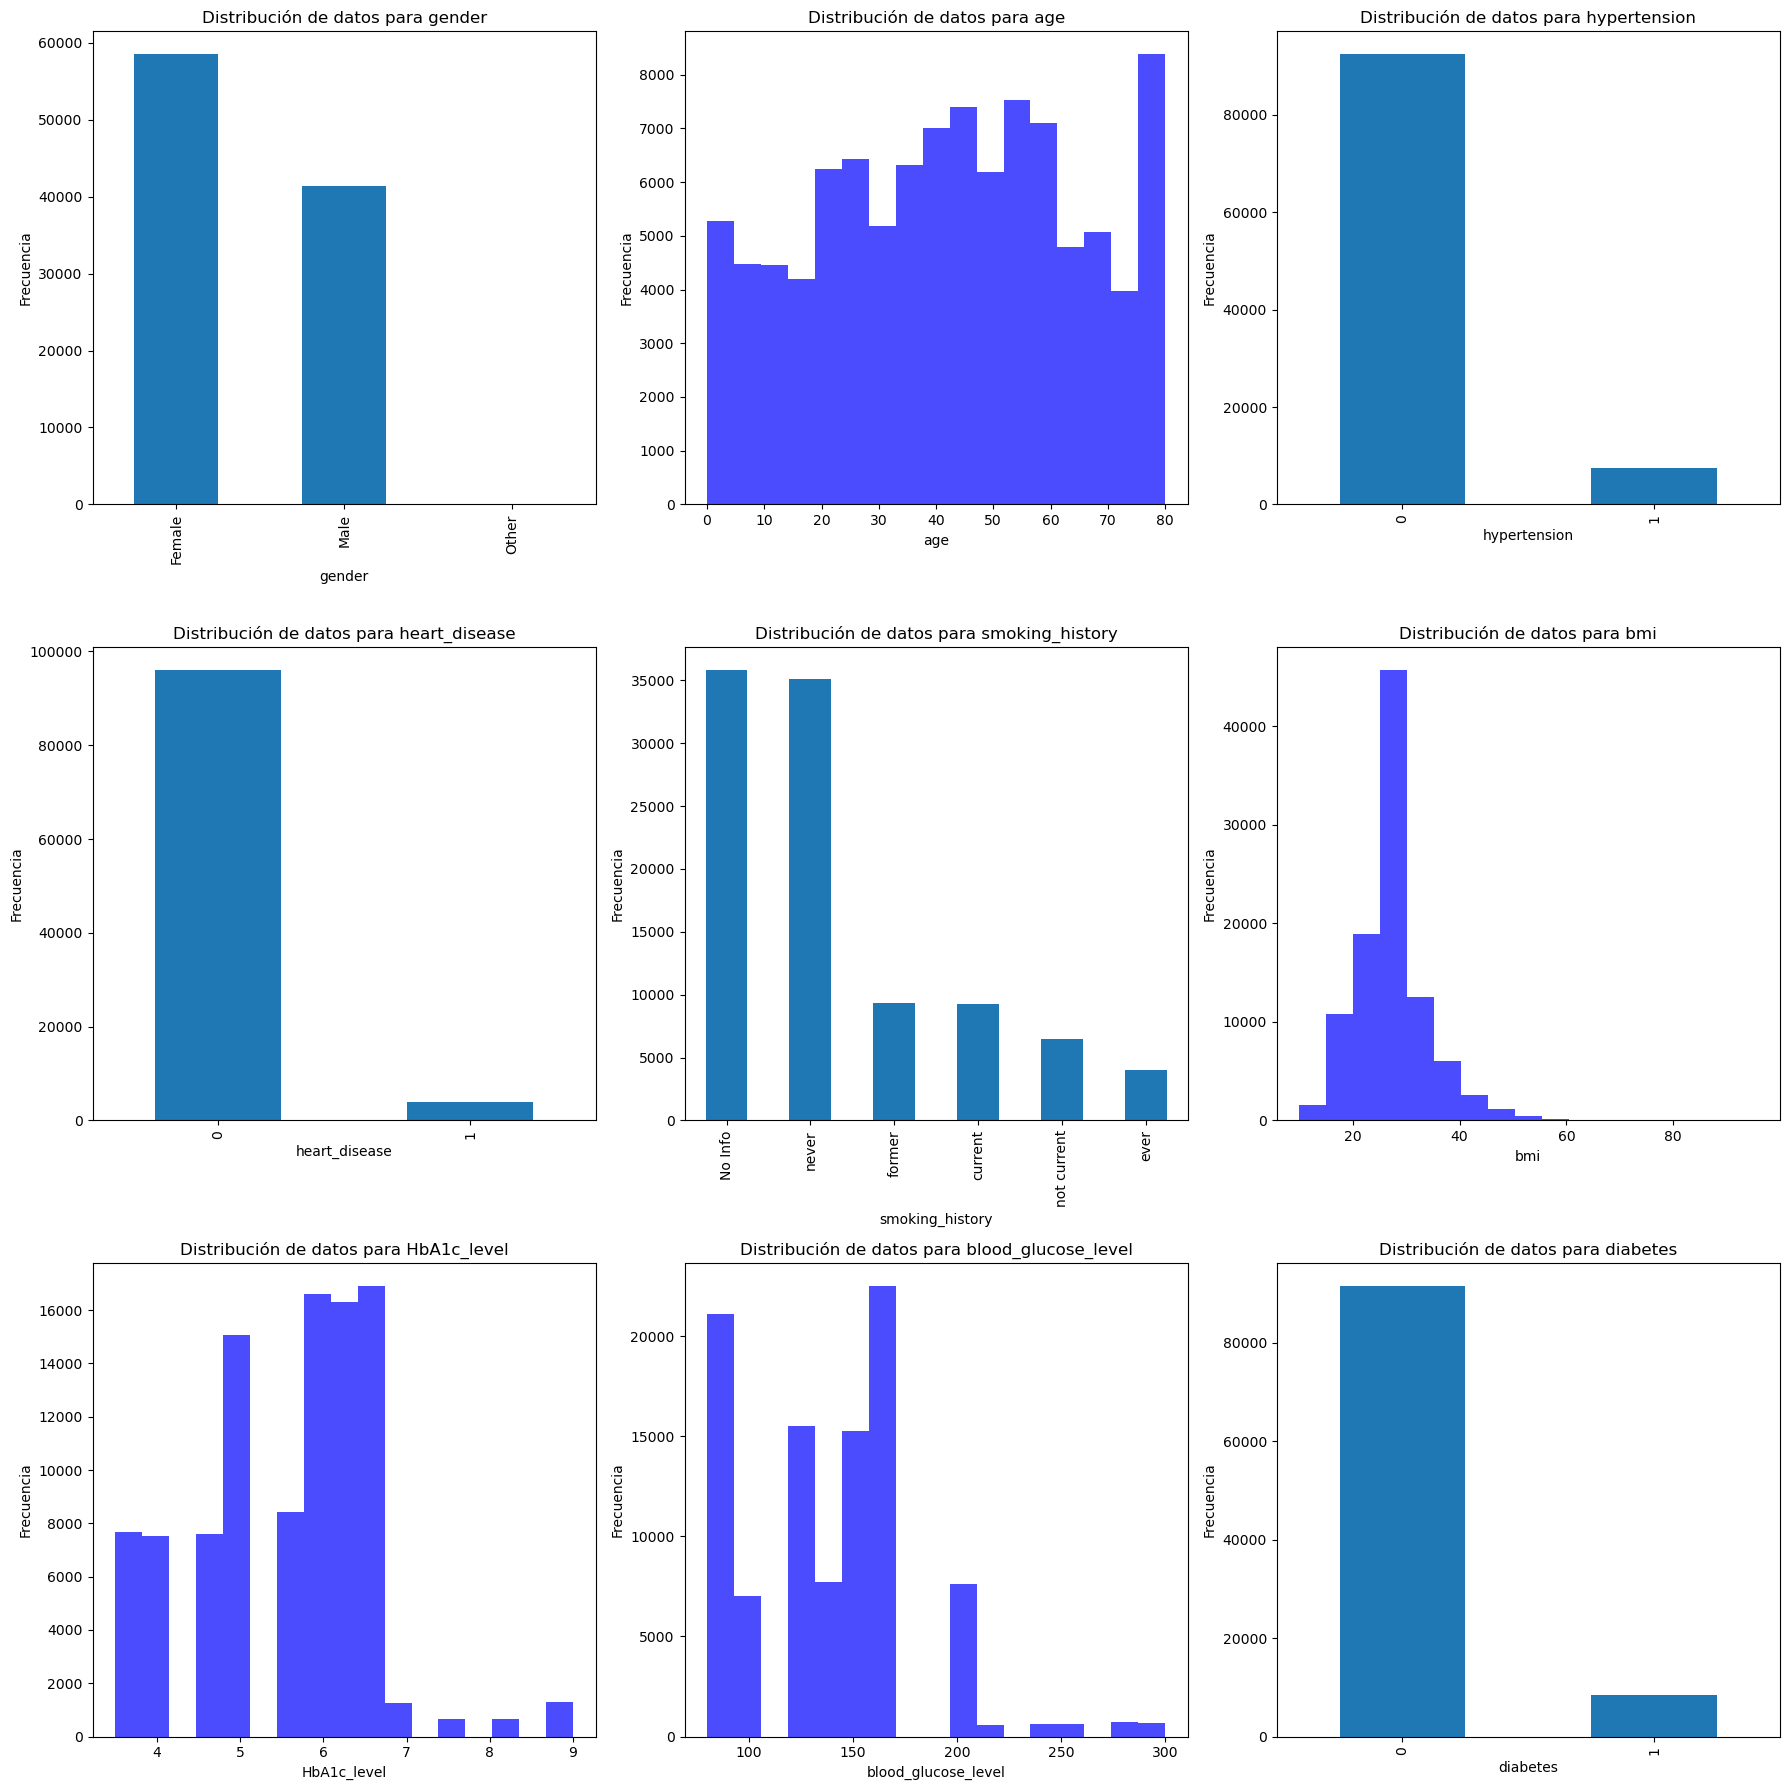

In [3]:
fig, axes = plt.subplots(3,3, figsize=(18,18))
axes = axes.ravel()
for i, columna in enumerate(data):
    ax = axes[i]
    if columna in ['gender','hypertension','heart_disease','smoking_history', 'diabetes']:
        data[columna].value_counts().plot(kind='bar', ax = ax)
    else:
        N = len(data[columna])
        num_bins = int(1 + np.log2(N))
        data[columna].plot(kind='hist', bins=num_bins, color='blue', alpha=0.7, ax = ax)

    ax.set_title(f'Distribución de datos para {columna}')
    ax.set_xlabel(columna)
    ax.set_ylabel('Frecuencia')

# Mostrar el gráfico en pantalla
plt.tight_layout()
plt.show()

**2. Tratamiento de Datos: Conversión de Datos Categóricos a Numéricos**

Convertiremos datos categóricos en representaciones numéricas para su uso en modelos de aprendizaje automático.

In [5]:
# Creamos un encoder para la columna 'gender'
gender_encoder = OneHotEncoder(sparse=False)
gender_encoded = gender_encoder.fit_transform(data[['gender']])

# Creamos un encoder para la columna 'smoking_history'
smoking_history_encoder = OneHotEncoder(sparse=False)
smoking_history_encoded = smoking_history_encoder.fit_transform(data[['smoking_history']])

# Convertimos en DataFrames
gender_encoded_df = pd.DataFrame(gender_encoded, columns=gender_encoder.get_feature_names_out(['gender']))
smoking_history_encoded_df = pd.DataFrame(smoking_history_encoded, columns=smoking_history_encoder.get_feature_names_out(['smoking_history']))

# Eliminamos las columnas originales
data = data.drop(['gender', 'smoking_history'], axis=1)

# Concatenamos los DataFrames codificados 
data = pd.concat([data, gender_encoded_df, smoking_history_encoded_df], axis=1)

# Ejemplo de los datos
display(data.head())



/home/estudiantes/camilo.avendano1/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/estudiantes/camilo.avendano1/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,54.0,0,0,27.32,6.6,80,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,28.0,0,0,27.32,5.7,158,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,36.0,0,0,23.45,5.0,155,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,76.0,1,1,20.14,4.8,155,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Ahora podemos visualiar la matriz de correlaciones 

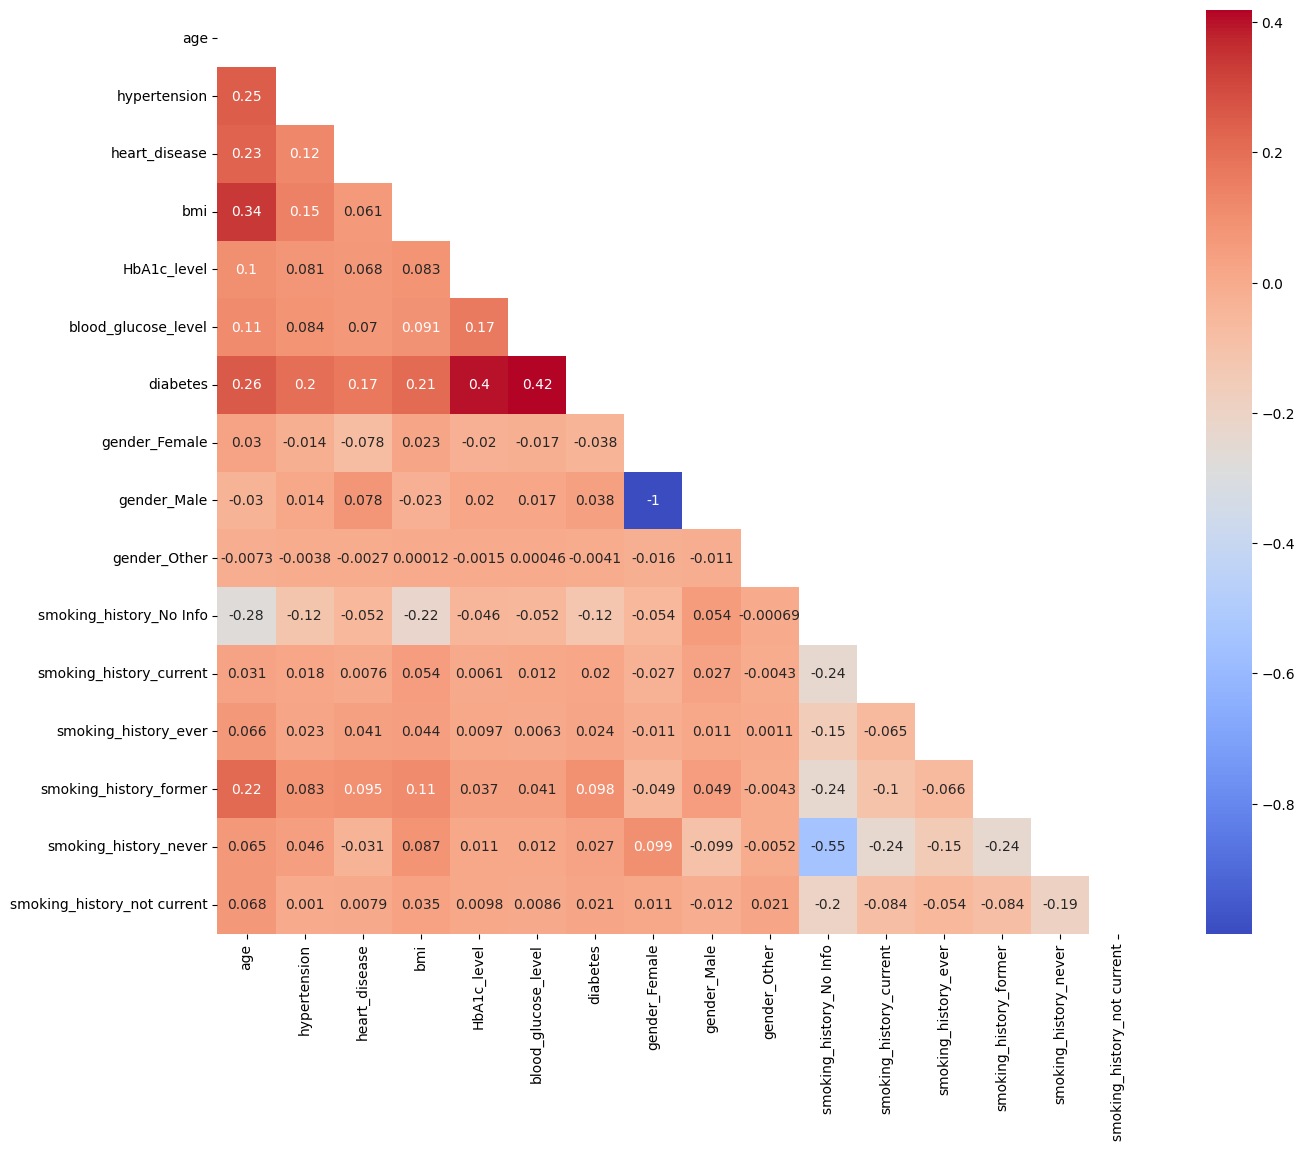

In [6]:
# definimos matriz de correlacion
corr = data.corr(method='pearson')
# Creamos una máscara que filtre la diagonal superior de la matriz (para ignorar duplicados)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
#generamos hotmap con seaborn
plt.figure(figsize=(15,12))
sns.heatmap(corr, mask=mask, cmap="coolwarm", annot=True)
plt.show()

Analisis de valores de correlacion Negativa Altos  < -0.80
gender_Female y gender_Male: esta es claramente una relacion inversa ya que claramente si un paciente es hombre, no puede ser mujer, por ello indica una correlacion negativa perfecta

Analisis de valores de correlacion Negativa Medios  -0.4 < correlacion < -0.8
Smoking_history_no_Info y Smoking_history_Never: indica que hay una relación inversa moderada entre estas dos variables. Esto significa que si un paciente no tiene información sobre su historial de tabaquismo, es menos probable que nunca haya fumado. Es importante tener en cuenta que no podemos concluir que la falta de información sobre el historial de tabaquismo sea la causa directa de que un paciente haya fumado en el pasado o lo haga actualmente. Pueden haber otros factores que influyan en la relación entre estas dos variables.

Analisis de valores de correlacion media 0.4 < correlacion < 0.8


**3. Particion de los datos para entrenamiento**

Separaremos los datos, siendo 70% de los datos para entrenamiento y 30% para validacion.

In [6]:
# Importamos las funciones de sklearn
from sklearn.model_selection import train_test_split

# Dividimos los datos en variables de entrada y salida
X = data.drop('diabetes', axis=1)
Y = data['diabetes']

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)


In [ ]:
# 